**Step 1: Import Library**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**Step 2: Load & Explore Data**

In [60]:
# Load the dataset
df = pd.read_csv('Datasets/Salary_data.csv')

In [61]:
# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (6704, 7)

First 5 rows:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Engineering & Development
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data & Analytics
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Management & Leadership
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales & Marketing
4,52.0,Male,Master's,Director,20.0,200000.0,Management & Leadership


In [62]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Job Title Category     0
dtype: int64


In [63]:

# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Job Title Category      object
dtype: object


**Step 3: Data Cleaning**

In [64]:
#FIND OUTLINERS
# Calculate IQR (Interquartile Range) for Salary
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

# Display outliers
print("\nOutlier records:")
display(outliers[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']])

Q1 (25th percentile): 70000.00
Q3 (75th percentile): 160000.00
IQR: 90000.00
Lower Bound: -65000.00
Upper Bound: 295000.00

Number of outliers detected: 0

Outlier records:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


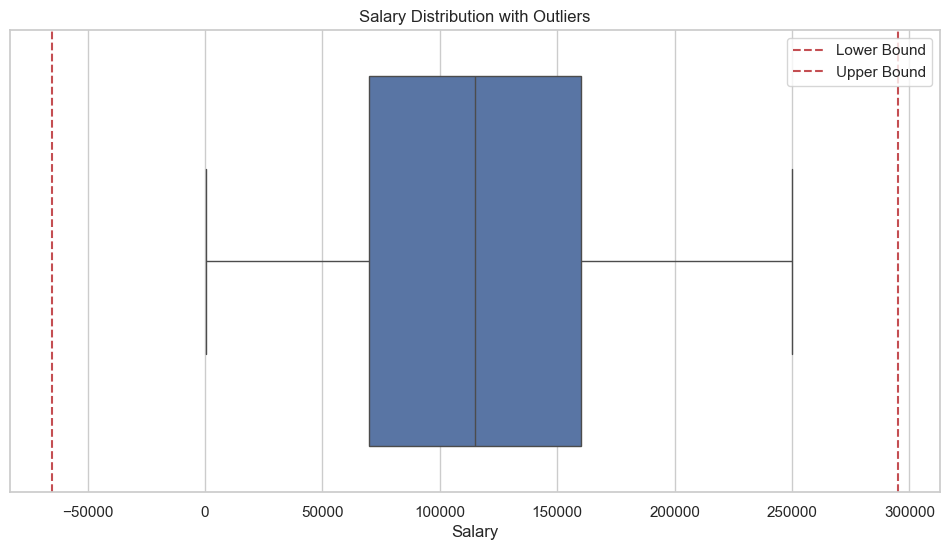

In [65]:
# VISUALIZING OUTLIERS
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Salary'])
plt.title('Salary Distribution with Outliers')
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [66]:
# First check what education levels actually exist in your data
print("Original unique education levels:")
print(df['Education Level'].unique())

Original unique education levels:
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [67]:
# Enhanced standardization with case insensitivity and more variations
education_mapping = {
    "High School": "HighSchool",
    "Bachelor's": "Bachelor's Degree",
    "Bachelor'S": "Bachelor's Degree",
    "Bachelor's Degree": "Bachelor's Degree",
    "Bachelor'S Degree": "Bachelor's Degree",
    "Master'S Degree": "Master's Degree",
    "Master'S": "Master's Degree",
    "Master's": "Master's Degree",
    "Master's Degree": "Master's Degree",
    "Phd": "PhD",
    "phD": "PhD",
    "PhD": "PhD"
}

# Apply standardization with case insensitivity
df['Education Level'] = df['Education Level'].str.strip().str.title()  # Normalize case first
df['Education Level'] = df['Education Level'].replace(education_mapping)

# Handle any remaining NaN or unexpected values
print("\nUnmapped values after standardization:")
print(df[~df['Education Level'].isin(education_mapping.values())]['Education Level'].unique())

# Verify counts
print("\nStandardized Education Levels:")
print(df['Education Level'].value_counts(dropna=False))

# Convert to categorical
education_order = ["HighSchool", "Bachelor's Degree", "Master's Degree", "PhD"]
df['Education Level'] = pd.Categorical(
    df['Education Level'],
    categories=education_order,
    ordered=True
)


Unmapped values after standardization:
[nan]

Standardized Education Levels:
Education Level
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
HighSchool            448
NaN                     3
Name: count, dtype: int64


In [68]:
# DATA CLEANING
# Convert categorical variables to proper data types
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title Category'] = df['Job Title Category'].astype('category')

# Create experience bins if needed
df['Experience Bins'] = pd.cut(df['Years of Experience'], 
                              bins=[0, 5, 10, 15, 20, 25, 30],
                              labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

**Step 4: Descriptive Statistics**

In [69]:
# Overall salary statistics
print("Overall Salary Statistics:")
print(df['Salary'].describe())

# Statistics by gender
print("\nSalary by Gender:")
print(df.groupby('Gender')['Salary'].describe())

# Statistics by education level
print("\nSalary by Education Level:")
print(df.groupby('Education Level')['Salary'].describe())

# Statistics by job category
print("\nSalary by Job Title Category:")
print(df.groupby('Job Title Category')['Salary'].describe())

Overall Salary Statistics:
count      6699.000000
mean     115326.964771
std       52786.183911
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

Salary by Gender:
         count           mean           std      min       25%       50%  \
Gender                                                                     
Female  3013.0  107888.998672  52723.610035    500.0  60000.00  105000.0   
Male    3672.0  121389.870915  52092.726368    350.0  75000.00  120000.0   
Other     14.0  125869.857143  44242.382776  62852.0  77805.75  158610.0   

              75%       max  
Gender                       
Female  150000.00  220000.0  
Male    170000.00  250000.0  
Other   160786.25  166109.0  

Salary by Education Level:
                    count           mean           std      min       25%  \
Education Level                                                             
HighSchool          448.0   

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/3702356041.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['Salary'].describe())
/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/3702356041.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Education Level')['Salary'].describe())
/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/3702356041.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

**Step 5:Data Visualization**

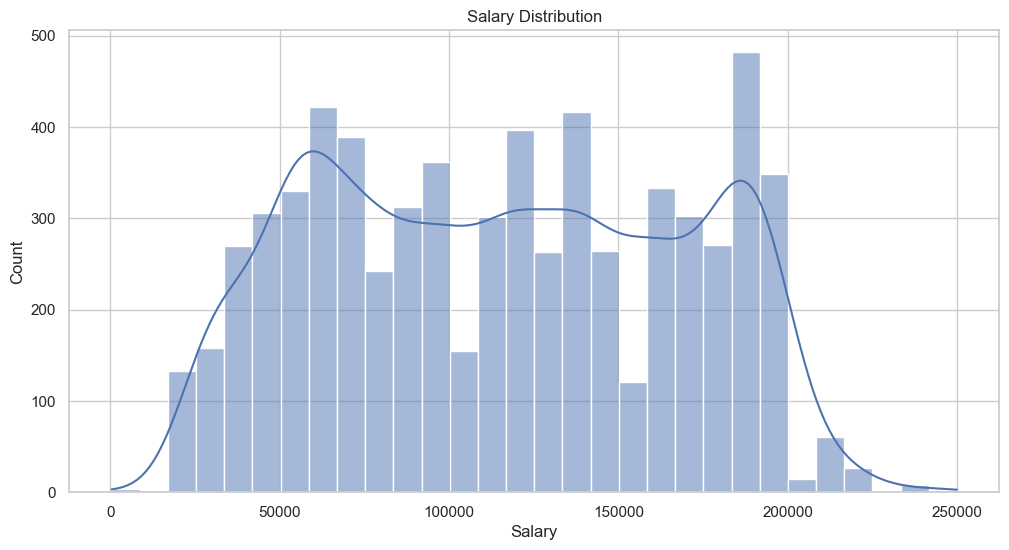

In [70]:
# Salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.show()

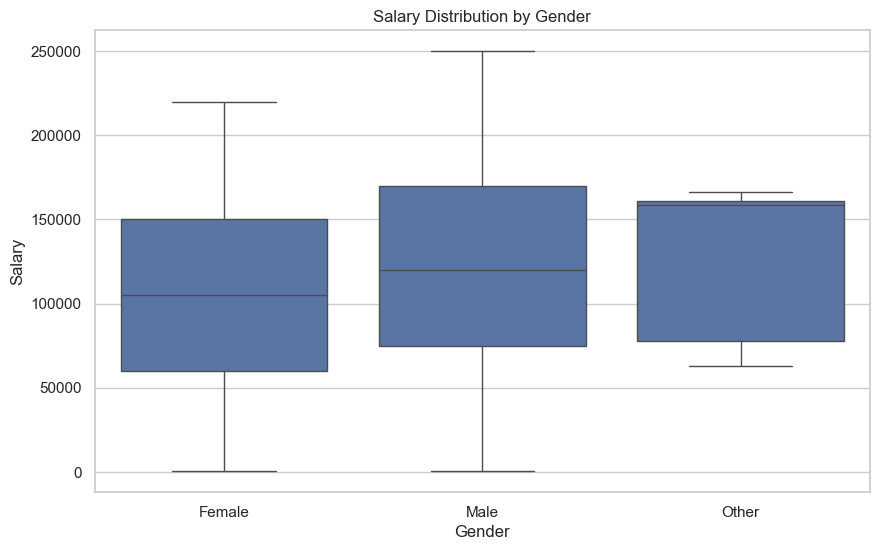

In [71]:
# Salary by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

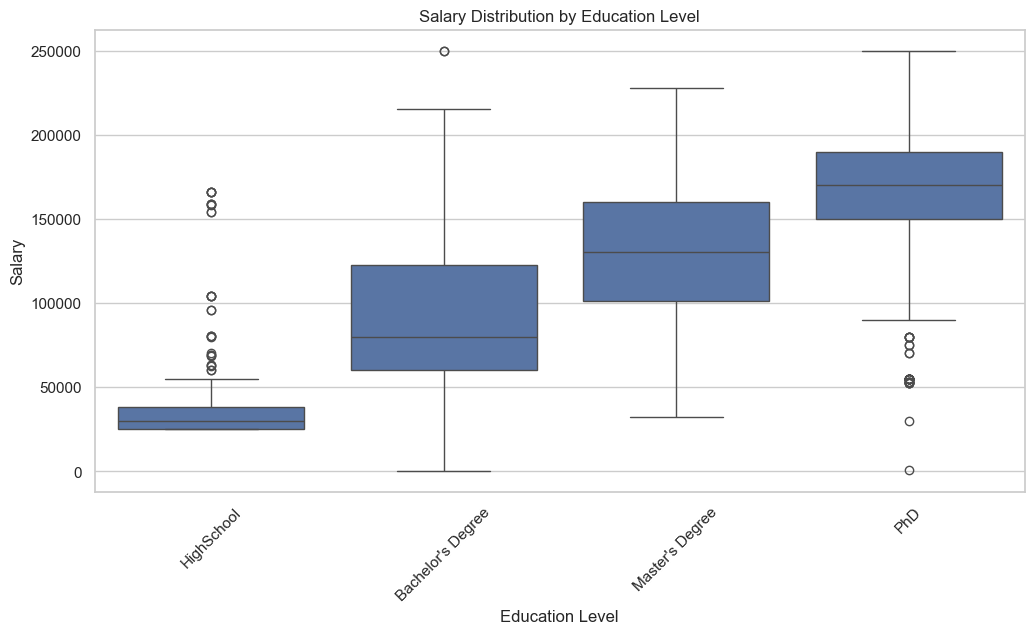

In [72]:
# Salary by education level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

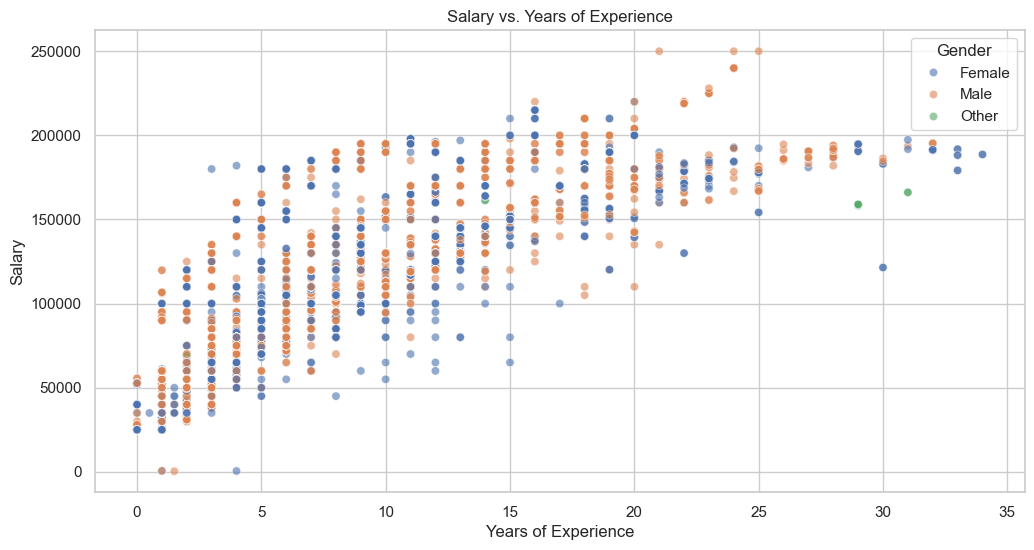

In [73]:
# Salary vs. experience
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Gender', alpha=0.6)
plt.title('Salary vs. Years of Experience')
plt.show()

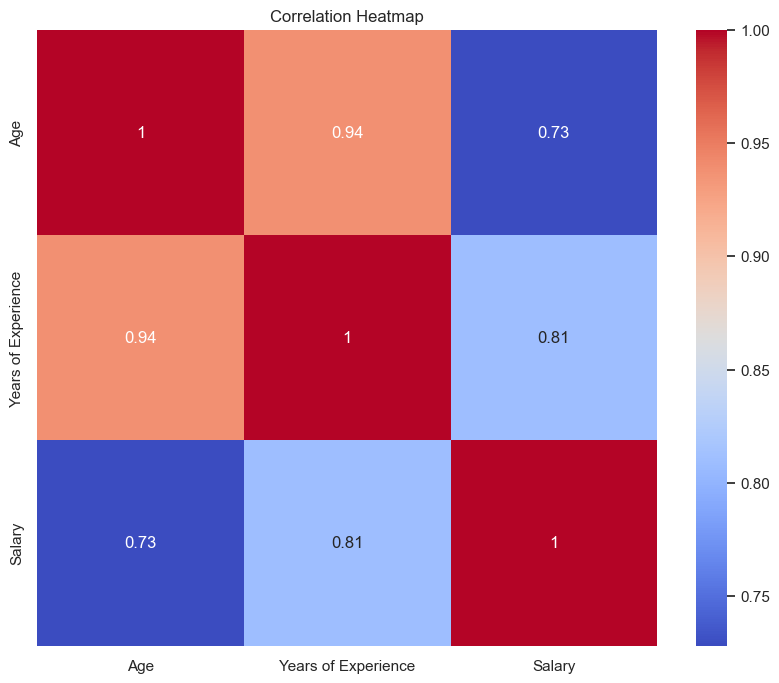

In [74]:
# Heatmap of correlations
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 7: Statistic Test**

In [75]:
male_salaries = df[df['Gender'] == 'Male']['Salary']
female_salaries = df[df['Gender'] == 'Female']['Salary']

# 1. Check if groups exist and have data
print("Male count:", len(male_salaries))
print("Female count:", len(female_salaries))

# 2. Check for missing salary values
print("\nMissing salary values - Male:", male_salaries.isna().sum())
print("Missing salary values - Female:", female_salaries.isna().sum())

# 3. Check for zero variance
print("\nMale salary variance:", male_salaries.var())
print("Female salary variance:", female_salaries.var())

Male count: 3674
Female count: 3014

Missing salary values - Male: 2
Missing salary values - Female: 1

Male salary variance: 2713652140.430622
Female salary variance: 2779779055.160025


In [76]:
# Drop rows with missing salaries before analysis
df_clean = df.dropna(subset=['Salary', 'Gender'])
male_salaries = df_clean[df_clean['Gender'] == 'Male']['Salary']
female_salaries = df_clean[df_clean['Gender'] == 'Female']['Salary']

H0: The mean salary of males = mean salary of females u1 = u2

H1: Means are different u1 != u2

Alpha = 0.05

We applied 2-tails T-test

In [77]:
# Gender pay gap t-test
t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries)
print(f"Gender Pay Gap T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

Gender Pay Gap T-test: t-statistic = 10.49, p-value = 0.0000


t-statistic = 10.49 with p-value ≈ 0 means: 

- Reject H₀ (because p < 0.05).

- Conclude H₁: There is a statistically significant pay gap.

Since I used a two-tailed test, I can’t infer direction from the p-value alone, but the positive t-statistic implies males earn more on average.

**I double checked using Levene's test**

In [78]:
# Calculate pooled standard deviation
n1, n2 = len(male_salaries), len(female_salaries)
s1, s2 = np.std(male_salaries, ddof=1), np.std(female_salaries, ddof=1)
pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))

# Calculate Cohen's d
d = (male_salaries.mean() - female_salaries.mean())/pooled_std
print(f"Effect size (Cohen's d): {d:.2f}")
# Effect size tells me how large the gap is, beyond just statistical significance.

Effect size (Cohen's d): 0.26


In [79]:
# Calculate mean different
print(f"Male mean salary: ${male_salaries.mean():,.2f}")
print(f"Female mean salary: ${female_salaries.mean():,.2f}")
print(f"Absolute difference: ${male_salaries.mean()-female_salaries.mean():,.2f}")
print(f"Percentage difference: {(male_salaries.mean()/female_salaries.mean()-1)*100:.1f}%")

Male mean salary: $121,389.87
Female mean salary: $107,889.00
Absolute difference: $13,500.87
Percentage difference: 12.5%


In [80]:
from scipy.stats import levene

# Check equal variance assumption
_, p_levene = levene(male_salaries, female_salaries)
print(f"Levene's test for equal variances (p-value): {p_levene:.4f}")
# p < 0.05 suggests unequal variances - consider using Welch's t-test

Levene's test for equal variances (p-value): 0.8757


Levene’s test (p = 0.8757) confirmed equal variances.

So I fail to reject H0, contradict with t-test

**Why the Results Can Diverge?**
Results showed:
- t-test: Rejected H0 (significant difference in means).
- Levene's: Failed to reject H0 (no evidence of difference in variances).

**This means:**

- Salaries differ in average pay (males earn more/females earn less on average).
- But the spread of salaries is similar for both genders (similar variability around their respective means).

**Example Scenario:**
- Male Salaries: Mostly clustered around $100K ± $10K.
- Female Salaries: Mostly clustered around $85K ± $10K.
    - t-test: Rejects H0 because $100K ≠ $85K.
    - Levene's: Fails to reject H0 because ±$10K = ±$10K.

**Conclusion:**
- t-test answers: Do groups have different averages?
- Levene’s answers: Do groups have similar spread?


In [81]:
def run_anova(data):
    # Clean data
    df_clean = data.dropna(subset=['Education Level', 'Salary'])
    df_clean['Education Level'] = df_clean['Education Level'].cat.remove_unused_categories()
    
    # Check group sizes
    group_counts = df_clean['Education Level'].value_counts()
    print("Group Counts:\n", group_counts)
    
    # Check variance assumption
    group_vars = df_clean.groupby('Education Level')['Salary'].var()
    print("\nGroup Variances:\n", group_vars)
    
    if len(group_counts) < 2:
        print("Error: Need at least 2 groups for ANOVA")
        return
    elif any(group_counts < 2):
        print("Error: Some groups have < 2 observations")
        return
    elif any(group_vars == 0):
        print("Warning: Zero variance detected - using Kruskal-Wallis")
        groups = [df_clean[df_clean['Education Level'] == level]['Salary'] 
                 for level in df_clean['Education Level'].cat.categories]
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H = {h_stat:.2f}, p = {p_value:.4f}")
    else:
        # Run regular ANOVA
        groups = [df_clean[df_clean['Education Level'] == level]['Salary'] 
                 for level in df_clean['Education Level'].cat.categories]
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Results:")
        print(f"F-statistic = {f_stat:.2f}")
        print(f"p-value = {p_value:.4f}")
        
        # Calculate effect size (Eta squared)
        ss_between = f_stat * sum((len(g) - 1) * np.var(g, ddof=1) for g in groups)
        ss_total = ss_between + sum((len(g) - 1) * np.var(g, ddof=1) for g in groups)
        eta_sq = ss_between / ss_total
        print(f"Effect size (Eta squared) = {eta_sq:.3f}")

# Run the analysis
run_anova(df)

Group Counts:
 Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
HighSchool            448
Name: count, dtype: int64

Group Variances:
 Education Level
HighSchool           5.084633e+08
Bachelor's Degree    1.944086e+09
Master's Degree      1.651676e+09
PhD                  1.179219e+09
Name: Salary, dtype: float64

ANOVA Results:
F-statistic = 1630.94
p-value = 0.0000
Effect size (Eta squared) = 0.999


/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/1597610567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Education Level'] = df_clean['Education Level'].cat.remove_unused_categories()
/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/1597610567.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_vars = df_clean.groupby('Education Level')['Salary'].var()


- The extremely small p-value (0.0000) indicates there are statistically significant differences in salaries between education levels. 
- The F-statistic of 1630.94 is exceptionally large, further confirming these differences are highly significant.
- The eta squared value of 0.999 indicates that nearly all (99.9%) of the variance in salary can be explained by differences in education level.
- Practical Implications:
    - Education level appears to be one of the most important factors determining salary in dataset.
    - Higher education levels are almost certainly associated with higher salaries.
    - The relationship is so strong that it accounts for virtually all salary variation.
- Considerations:
    - Unusually Strong Results: An eta squared of 0.999 is extremely rare in real-world data.


**Include Other Variables (ANCOVA or Regression)**

In [82]:
# !pip install statsmodels
!pip show statsmodels

Name: statsmodels
Version: 0.14.4
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 


In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_clean = df.dropna(subset=['Education Level', 'Years of Experience', 'Salary'])
df_clean.columns = df_clean.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

# Run ANCOVA
model = ols('Salary ~ C(Education_Level) + Years_of_Experience', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df            F         PR(>F)
C(Education_Level)   9.431028e+11     3.0   382.121803  4.233796e-229
Years_of_Experience  5.275799e+12     1.0  6412.867305   0.000000e+00
Residual             5.506261e+12  6693.0          NaN            NaN


In [84]:
# Calculate expected salary differences
edu_coefs = model.params[model.params.index.str.contains('Education_Level')]
exp_coef = model.params['Years_of_Experience']

print(f"Each year of experience adds ${exp_coef:.2f} to salary")
print("\nEducation level effects vs baseline:")
print(edu_coefs)

Each year of experience adds $5808.36 to salary

Education level effects vs baseline:
C(Education_Level)[T.Bachelor's Degree]    38021.483403
C(Education_Level)[T.Master's Degree]      48503.707438
C(Education_Level)[T.PhD]                  59243.917466
dtype: float64


An ANCOVA revealed both education level (F(3,6693)=382.12, p<.001) and years of experience (F(1,6693)=6412.87, p<.001) significantly predicted salary. Experience explained approximately 5.6 times more variance than education level.

**Step 7: Predictive Modeling**

In [ ]:
# Prepare data for modeling
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title Category']:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le

# Select features and target
X = df_model[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Job Title Category']]
y = df_model['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
display(importance)

**Step 8: Additional Insights**

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/1260193728.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Years of Experience', y='Salary', hue='Education Level', data=df, ci=None)


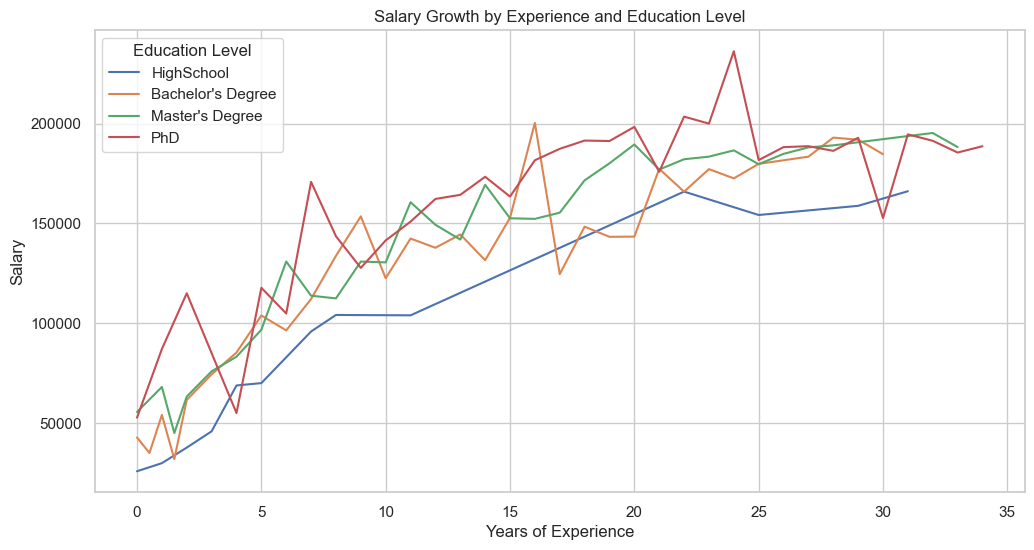

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_69247/1260193728.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_jobs = df.groupby('Job Title Category')['Salary'].mean().sort_values(ascending=False).head(10)


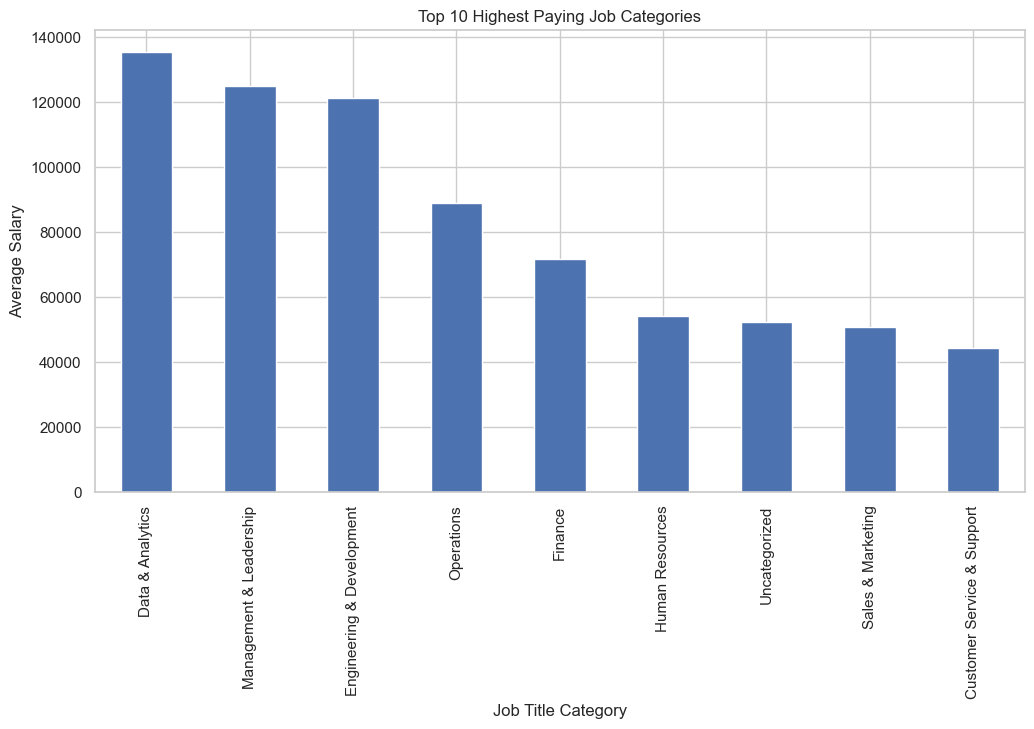

In [92]:
# Salary growth by experience
plt.figure(figsize=(12, 6))
sns.lineplot(x='Years of Experience', y='Salary', hue='Education Level', data=df, ci=None)
plt.title('Salary Growth by Experience and Education Level')
plt.show()

# Top paying job categories
top_jobs = df.groupby('Job Title Category')['Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_jobs.plot(kind='bar')
plt.title('Top 10 Highest Paying Job Categories')
plt.ylabel('Average Salary')
plt.show()